In [1]:
import pandas as pd
#%matplotlib inline
#GRO import
GRO = pd.read_excel('https://recovery.smithschool.ox.ac.uk/wp-content/uploads/2021/05/20210524-Global-Recovery-Observatory-publicv2.xlsx', sheet_name="COVID-19 Measures",
                  na_values=[".."], usecols={'Country', 'Total Value, USD (billions)', 'Clean archetype?', 'Recovery?'})
index = GRO[GRO['Recovery?'] != 1].index
rec = GRO.drop(index, inplace=False)
rec = rec.groupby(["Country"], as_index=False).sum()
rec = rec.drop(columns=['Recovery?', 'Clean archetype?'])

index2 = GRO[GRO['Clean archetype?'] != 1].index
greenrec = GRO.drop(index2, inplace=False)
index = greenrec[greenrec['Recovery?'] != 1].index
greenrec.drop(index, inplace=True)
greenrec = greenrec.groupby(["Country"], as_index=False).sum()
greenrec = greenrec.drop(columns=['Recovery?', 'Clean archetype?'])
#r'C:\Users\ebloom\Desktop\GRO.xlsx'


In [2]:
merge = greenrec.merge(rec, how='left', left_on='Country', right_on='Country')
merge['Percent'] = (merge['Total Value, USD (billions)_x'] / merge['Total Value, USD (billions)_y']) * 100
merge.rename(columns = {"Total Value, USD (billions)_x" : "Green recovery spending", "Total Value, USD (billions)_y" : "Recovery spending"}, inplace=True)
merge = merge.round({"Percent" : 2})
merge1 = merge[['Country', 'Green recovery spending', 'Percent']]
merge1

,Country,Green recovery spending,Percent
0,Argentina,0.00,0.00
1,Australia,2.30,1.76
2,Austria,0.38,23.75
3,Bangladesh,0.55,87.30
4,Brazil,0.28,51.85
5,Burkina Faso,0.00,NaN
6,Canada,21.67,55.99
7,Chile,0.45,14.38
8,China,51.88,12.14
9,Colombia,0.15,46.88


In [3]:
#renewable energy consumption import
df = pd.read_excel('https://www.irena.org/IRENADocuments/IRENA_RE_data_balances_extract-JULY2020.xlsx',
                  na_values=["0", ".."])
df = df[df['Year'] == 2018]
df = df[df['Technology/source'] == 'GrandTotal']
df = df[df['Category'] == 'Final Consumption-Total']
df = df.round(2)
df.loc[df['Country']=='United States of America']
df.at[11368, 'Country'] = 'United States'
GROmerge = merge1.merge(df, how='left', left_on='Country', right_on='Country')
GROmerge = GROmerge[['Country', 'Percent', 'Green recovery spending', 'TJ']]
GROmerge.rename(columns = {"TJ" : "Renewable energy consumption (TJ)"}, inplace=True)
GROmerge
#r'C:\Users\ebloom\Desktop\IRENA.xlsx'


,Country,Percent,Green recovery spending,Renewable energy consumption (TJ)
0,Argentina,0.00,0.00,267341.51
1,Australia,1.76,2.30,NaN
2,Austria,23.75,0.38,371003.09
3,Bangladesh,87.30,0.55,NaN
4,Brazil,51.85,0.28,3406346.36
5,Burkina Faso,NaN,0.00,NaN
6,Canada,55.99,21.67,NaN
7,Chile,14.38,0.45,295176.56
8,China,12.14,51.88,10399138.67
9,Colombia,46.88,0.15,405234.43


In [4]:
import pycountry
#deforestation import
df = pd.read_csv(r'C:\Users\ebloom\Desktop\Global_Annual_Treecover_Loss.csv', usecols={"iso", "umd_tree_cover_loss__year", "umd_tree_cover_loss__ha"},
                  na_values=["0", ".."])
df.rename(columns = {"umd_tree_cover_loss__year" : "Year", "umd_tree_cover_loss__ha" : "Tree Cover Loss (ha)"}, inplace=True)
df = df.round({'Tree Cover Loss (ha)' : 2})
df = pd.pivot_table(df, values='Tree Cover Loss (ha)', index=['iso'], columns=['Year'])
df.rename(columns={2018 : '2018', 2019 : '2019'},inplace=True)
df = df[['2018', '2019']]

countries = {}
for country in pycountry.countries:
    countries[country.alpha_3] = country.name
##print(countries)
df['Country'] = [countries.get(code) for code in df.index]
df.at['VNM', 'Country'] = "Vietnam"
df.at['KOR', 'Country'] = "South Korea"
df


Year,2018,2019,Country
iso,,,
ABW,0.30,NaN,Aruba
AFG,25.71,17.12,Afghanistan
AGO,242552.50,175098.37,Angola
AIA,0.22,NaN,Anguilla
ALA,619.71,2361.29,Åland Islands
...,...,...,...
XKO,593.89,697.40,None
XNC,17.55,12.56,None
ZAF,63666.75,76139.76,South Africa


In [5]:
GROmerge = GROmerge.merge(df, how='left', left_on='Country', right_on='Country')
GROmerge.rename(columns = {"2019" : "Annual tree cover loss (ha)"}, inplace=True)
GROmerge = GROmerge[['Country', 'Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)']]
#GROmerge = GROmerge.drop(columns={'2018'})
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha)
0,Argentina,0.00,0.00,267341.51,145444.27
1,Australia,2.30,1.76,NaN,1661547.60
2,Austria,0.38,23.75,371003.09,33642.43
3,Bangladesh,0.55,87.30,NaN,22078.76
4,Brazil,0.28,51.85,3406346.36,2696748.80
5,Burkina Faso,0.00,NaN,NaN,NaN
6,Canada,21.67,55.99,NaN,2175715.83
7,Chile,0.45,14.38,295176.56,78735.47
8,China,51.88,12.14,10399138.67,496972.44
9,Colombia,0.15,46.88,405234.43,268409.88


In [6]:
#natural resource rents import

nr = pd.read_excel(r'C:\Users\ebloom\Desktop\Data_Extract_From_Adjusted_Net_Savings.xlsx',
                   usecols=["Country Name", "Country Code", "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]"],
                  na_values=["0", ".."])
nr.rename(columns = {"2017 [YR2017]" : "2017", "2018 [YR2018]" : "2018", "2019 [YR2019]" : "2019"}, inplace=True)
nr = nr.round({'2017' : 2, '2018' : 2, '2019' : 2})
nr = nr.drop(nr.index[264:269])
nr = nr.drop(nr.index[0:47])
nr.at[152, 'Country Name'] = "South Korea"
nr

,Country Name,Country Code,2017,2018,2019
47,Aruba,ABW,0.00,NaN,NaN
48,Afghanistan,AFG,0.70,0.92,0.77
49,Angola,AGO,16.45,27.43,26.19
50,Albania,ALB,1.36,1.82,1.59
51,Andorra,AND,NaN,NaN,NaN
...,...,...,...,...,...
259,Kosovo,XKX,0.55,0.55,0.40
260,"Yemen, Rep.",YEM,2.00,4.44,5.44
261,South Africa,ZAF,3.64,3.60,3.94
262,Zambia,ZMB,13.30,11.31,6.43


In [7]:
GROmerge = GROmerge.merge(nr, how='left', left_on='Country', right_on='Country Name')
GROmerge = GROmerge[['Country', 'Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)', '2019', 'Country Code']]
GROmerge.rename(columns = {"2019" : "Natural resource rents as % GDP"}, inplace=True)
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Country Code
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,ARG
1,Australia,2.30,1.76,NaN,1661547.60,5.36,AUS
2,Austria,0.38,23.75,371003.09,33642.43,0.13,AUT
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,BGD
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,BRA
5,Burkina Faso,0.00,NaN,NaN,NaN,4.19,BFA
6,Canada,21.67,55.99,NaN,2175715.83,1.90,CAN
7,Chile,0.45,14.38,295176.56,78735.47,2.30,CHL
8,China,51.88,12.14,10399138.67,496972.44,1.26,CHN
9,Colombia,0.15,46.88,405234.43,268409.88,4.52,COL


In [57]:
#fossil fuel subs import
df = pd.read_excel(r'C:\Users\ebloom\Desktop\FossilFuelSubsidiesTracker.xlsx', sheet_name='fulldata',
                  na_values=["0.00", ".."])
df = df[df['Year'] == 2019]
df = df.groupby(['Country']).sum()
df = df.drop(columns={'Year'})
df['% share of GDP'] = df['% share of GDP'] * 100
df = df.round(2)
df = df.reset_index()
df
#https://fossilfuelsubsidytracker.org/wp-content/uploads/2021/04/FossilFuelSubsidiesTracker_CountryData.xlsx
#r'C:\Users\ebloom\Desktop\FossilFuelSubsidiesTracker.xlsx'

,Country,% share of GDP,USD nominal per Capita
0,Algeria,7.72,304.63
1,Angola,1.13,33.55
2,Argentina,1.15,115.00
3,Armenia,0.03,1.60
4,Australia,0.52,284.86
...,...,...,...
76,United Kingdom,0.54,228.02
77,United States,0.04,24.94
78,Uzbekistan,7.63,134.07
79,Venezuela,0.00,448.04


In [9]:
df[df['Country'] == 'Korea']
df.at[42, 'Country'] = "South Korea"
df[df['Country'] == 'Viet Nam']
df.at[80, 'Country'] = "Vietnam"
df[df['Country'] == "People's Republic of China"]
df.at[57, 'Country'] = "China"

In [10]:
GROmerge = GROmerge.merge(df, how='left', left_on='Country', right_on='Country')
GROmerge.rename(columns = {"% share of GDP" : "Fossil fuel subsidies as % GDP", "USD nominal per Capita": "Fossil fuel subsidies USD per Capita"}, inplace=True)
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Country Code,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,ARG,1.15,115.00
1,Australia,2.30,1.76,NaN,1661547.60,5.36,AUS,0.52,284.86
2,Austria,0.38,23.75,371003.09,33642.43,0.13,AUT,0.19,95.99
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,BGD,0.56,10.37
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,BRA,0.46,40.21
5,Burkina Faso,0.00,NaN,NaN,NaN,4.19,BFA,NaN,NaN
6,Canada,21.67,55.99,NaN,2175715.83,1.90,CAN,0.13,60.34
7,Chile,0.45,14.38,295176.56,78735.47,2.30,CHL,0.43,64.12
8,China,51.88,12.14,10399138.67,496972.44,1.26,CHN,0.33,32.53
9,Colombia,0.15,46.88,405234.43,268409.88,4.52,COL,0.41,26.58


In [11]:
#CO2 data import

df = pd.read_excel('https://iea.blob.core.windows.net/assets/6296011e-4fed-40c3-95a0-1367a4c4484a/CO2Highlights2020.xls',
                   'CO2-POP', header=21, usecols=[0, 47, 48, 49], na_values='..')
df.columns = df.columns.astype(str)
df = df.round({'2017' : 2, '2018' : 2, '2019' : 2})
df = df[df['Region/Country/Economy'].str.contains('OECD')==False]
df = df.drop(df.index[169:172])
df = df.sort_values('Region/Country/Economy', ascending=True)
df.reset_index(drop=True, inplace=True)
df
#'https://iea.blob.core.windows.net/assets/6296011e-4fed-40c3-95a0-1367a4c4484a/CO2Highlights2020.xls'

,Region/Country/Economy,2017,2018,2019
0,Africa,0.97,0.98,NaN
1,Africa,0.97,0.98,NaN
2,Albania,1.51,1.50,NaN
3,Algeria,3.15,3.25,NaN
4,Americas,6.93,7.02,NaN
...,...,...,...,...
158,Venezuela,4.20,3.90,NaN
159,Viet Nam,2.02,2.37,NaN
160,Yemen,0.31,0.28,NaN
161,Zambia,0.35,0.39,NaN


In [12]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
df['Code'] = [countries.get(country) for country in df['Region/Country/Economy']]
df

,Region/Country/Economy,2017,2018,2019,Code
0,Africa,0.97,0.98,NaN,None
1,Africa,0.97,0.98,NaN,None
2,Albania,1.51,1.50,NaN,ALB
3,Algeria,3.15,3.25,NaN,DZA
4,Americas,6.93,7.02,NaN,None
...,...,...,...,...,...
158,Venezuela,4.20,3.90,NaN,None
159,Viet Nam,2.02,2.37,NaN,VNM
160,Yemen,0.31,0.28,NaN,YEM
161,Zambia,0.35,0.39,NaN,ZMB


In [13]:
df.at[18, 'Code'] = 'BOL'
df.at[29, 'Code'] = 'TWN'
df.at[37, 'Code'] = 'CZE'
df.at[40, 'Code'] = 'COD'
df.at[76, 'Code'] = 'IRN'
df.at[84, 'Code'] = 'KOR'
df.at[119, 'Code'] = 'CHN'
df.at[125, 'Code'] = 'MDA'
df.at[133, 'Code'] = 'SVK'
df.at[143, 'Code'] = 'SYR'
df.at[154, 'Code'] = 'TZA'
df.at[158, 'Code'] = 'VEN'

In [14]:
df = df.dropna(subset=['Code'])
df = df.rename(columns={'Region/Country/Economy' : 'Country'})
df.at[84, 'Country'] = 'South Korea'
df.at[119, 'Country'] = 'China'
df.at[159, 'Country'] = 'Vietnam'
df

,Country,2017,2018,2019,Code
2,Albania,1.51,1.50,NaN,ALB
3,Algeria,3.15,3.25,NaN,DZA
5,Angola,0.63,0.61,NaN,AGO
6,Argentina,3.95,3.85,NaN,ARG
7,Armenia,1.75,1.83,NaN,ARM
...,...,...,...,...,...
158,Venezuela,4.20,3.90,NaN,VEN
159,Vietnam,2.02,2.37,NaN,VNM
160,Yemen,0.31,0.28,NaN,YEM
161,Zambia,0.35,0.39,NaN,ZMB


In [15]:
GROmerge = GROmerge.merge(df, how='left', left_on='Country', right_on='Country')
GROmerge.rename(columns = {"2018" : "CO2 emissions tons per capita"}, inplace=True)
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Country Code,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,2017,CO2 emissions tons per capita,2019,Code
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,ARG,1.15,115.00,3.95,3.85,NaN,ARG
1,Australia,2.30,1.76,NaN,1661547.60,5.36,AUS,0.52,284.86,15.60,15.32,15.32,AUS
2,Austria,0.38,23.75,371003.09,33642.43,0.13,AUT,0.19,95.99,7.29,6.96,7.07,AUT
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,BGD,0.56,10.37,0.49,0.51,NaN,BGD
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,BRA,0.46,40.21,2.06,1.94,NaN,BRA
5,Burkina Faso,0.00,NaN,NaN,NaN,4.19,BFA,NaN,NaN,NaN,NaN,NaN,NaN
6,Canada,21.67,55.99,NaN,2175715.83,1.90,CAN,0.13,60.34,15.14,15.25,15.21,CAN
7,Chile,0.45,14.38,295176.56,78735.47,2.30,CHL,0.43,64.12,4.65,4.57,4.95,CHL
8,China,51.88,12.14,10399138.67,496972.44,1.26,CHN,0.33,32.53,6.67,6.84,NaN,CHN
9,Colombia,0.15,46.88,405234.43,268409.88,4.52,COL,0.41,26.58,1.42,1.47,NaN,COL


In [16]:
GROmerge = GROmerge[['Country', 'Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)',
                   'Natural resource rents as % GDP', 'Fossil fuel subsidies as % GDP', 'Fossil fuel subsidies USD per Capita', 'CO2 emissions tons per capita',
                   'Country Code']]
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Country Code
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,1.15,115.00,3.85,ARG
1,Australia,2.30,1.76,NaN,1661547.60,5.36,0.52,284.86,15.32,AUS
2,Austria,0.38,23.75,371003.09,33642.43,0.13,0.19,95.99,6.96,AUT
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,0.56,10.37,0.51,BGD
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,0.46,40.21,1.94,BRA
5,Burkina Faso,0.00,NaN,NaN,NaN,4.19,NaN,NaN,NaN,BFA
6,Canada,21.67,55.99,NaN,2175715.83,1.90,0.13,60.34,15.25,CAN
7,Chile,0.45,14.38,295176.56,78735.47,2.30,0.43,64.12,4.57,CHL
8,China,51.88,12.14,10399138.67,496972.44,1.26,0.33,32.53,6.84,CHN
9,Colombia,0.15,46.88,405234.43,268409.88,4.52,0.41,26.58,1.47,COL


In [17]:
# air pollution import

df = pd.read_excel(r'C:\Users\ebloom\Desktop\AAP.xlsx', sheet_name='latest availble PM25 (measured)', header=2,
                  na_values=["0", ".."])
df = df[df['Database version (year)'] == 2018]
df = df.drop(columns={'Region', 'Annual mean, ug/m3', 'note on converted PM10', 'Temporal coverage', 'status'})
df.loc[(df.iso3=='KOR', 'Country')] = 'South Korea'
df.loc[(df.iso3=='USA', 'Country')] = 'United States'
df.loc[(df.iso3=='VNM'), 'Country'] = 'Vietnam'
df = df[['iso3', 'Country', 'City/Town', 'Annual mean, ug/m3.1']]
df

,iso3,Country,City/Town,"Annual mean, ug/m3.1"
1,ALB,Albania,Vrith,13
2,AND,Andorra,Escaldes-Engordany,10
3,AUS,Australia,Adelaide,7
4,AUS,Australia,Brisbane,7
5,AUS,Australia,Bunbury,8
...,...,...,...,...
2583,USA,United States,York,9
2586,USA,United States,Yuba City,8
2587,USA,United States,Yuma,8
2588,VNM,Vietnam,Ha Noi,48


In [18]:
citypop = pd.read_csv(r'C:\Users\ebloom\Desktop\Citypop.csv',
                  na_values=["0", ".."])
citypop = citypop[['Name', 'Country', 'Population']]
citypop = citypop.sort_values(by='Country', ascending=True)
citypop.reset_index(inplace=True, drop=True)
ind = citypop.groupby(['Country'])['Population'].idxmax()
biggest = citypop.loc[ind]
biggest
#find most populous cities for each country in dataset

,Name,Country,Population
0,Kabul,Afghanistan,4335770
4,Tirana,Albania,502734
6,Algiers,Algeria,2809158
15,Luanda,Angola,8631876
24,Buenos Aires,Argentina,15257673
...,...,...,...
1149,Caracas,Venezuela,2945858
1154,Ho Chi Minh City,Vietnam,8837544
1160,Sanaa,Yemen,3075257
1167,Lusaka,Zambia,2905993


In [19]:
#what needs imputing, what should be there but difference in nomenclature
df[df['Country'] == 'Australia']
#Arg not in pollution data
#biggest city Melbourne only 2016 data - needs to be imputed
df[df['Country'] == 'Austria']
df.at[72, 'City/Town'] = 'Vienna'
df[df['Country'] == 'Colombia']
#biggest city Bogota not in data at all - needs to be imputed
df[df['Country'] == 'Dominican Republic']
#DR not in pollution data
#Iraq and Honduras not in at all
df[df['Country'] == 'Ireland']
df.at[1376, 'City/Town'] = 'Dublin'
df[df['City/Town'] == 'Roma']
df.at[1626, 'City/Town'] = 'Rome'
#Kenya and MUS not in data at all
#biggest city in Pakistan not in 2018 data, Karachi only 2016 needs to be imputed
biggest[biggest['Country'] == 'Pakistan']
df[df['City/Town'] == 'Warszawa']
df.at[1907, 'City/Town'] = 'Warsaw'
df[df['City/Town'] == 'New York']
df.at[2393, 'City/Town'] = 'New York City'
#no data for Jamaica at all
df[df['Country'] == 'Jamaica']

,iso3,Country,City/Town,"Annual mean, ug/m3.1"


In [20]:
pop = biggest.merge(df, how='left', left_on='Name', right_on='City/Town')
pop = pop.dropna(subset={'Annual mean, ug/m3.1'})
pop
#pollution in the world's biggest cities

,Name,Country_x,Population,iso3,Country_y,City/Town,"Annual mean, ug/m3.1"
7,Vienna,Austria,1944910,AUT,Austria,Vienna,14.0
9,Manama,Bahrain,663893,BHR,Bahrain,Manama,63.0
10,Dhaka,Bangladesh,21741090,BGD,Bangladesh,Dhaka,57.0
15,Sao Paulo,Brazil,22237472,BRA,Brazil,Sao Paulo,17.0
16,Sofia,Bulgaria,1284311,BGR,Bulgaria,Sofia,25.0
21,Toronto,Canada,6254571,CAN,Canada,Toronto,9.0
24,Santiago,Chile,6811595,CHL,Chile,Santiago,29.0
25,Shanghai,China,27795702,CHN,China,Shanghai,45.0
27,San Jose,Costa Rica,1420533,USA,United States,San Jose,9.0
28,Zagreb,Croatia,684524,HRV,Croatia,Zagreb,21.0


In [21]:
import numpy as np
#Havana, Dublin, New York City
#Kingston, Jamaica should not match Kingston Canada, should be NA
GROmerge = GROmerge.merge(pop, how='left', left_on='Country', right_on='Country_x')
GROmerge = GROmerge.drop([5, 10, 13, 14, 44, 47])
GROmerge.reset_index(drop=True, inplace=True)
GROmerge = GROmerge[['Country', 'Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)',
                   'Natural resource rents as % GDP', 'Fossil fuel subsidies as % GDP', 'Fossil fuel subsidies USD per Capita', 'CO2 emissions tons per capita',
                   'Annual mean, ug/m3.1', 'Country Code']]
GROmerge.at[21, 'Annual mean, ug/m3.1'] = np.nan
GROmerge.rename(columns = {"Annual mean, ug/m3.1" : "Air pollution (annual mean ug/m3 <PM2.5)"}, inplace=True)
GROmerge
#here is where I could potentially make them into rates

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,1.15,115.00,3.85,NaN,ARG
1,Australia,2.30,1.76,NaN,1661547.60,5.36,0.52,284.86,15.32,NaN,AUS
2,Austria,0.38,23.75,371003.09,33642.43,0.13,0.19,95.99,6.96,14.0,AUT
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,0.56,10.37,0.51,57.0,BGD
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,0.46,40.21,1.94,17.0,BRA
5,Canada,21.67,55.99,NaN,2175715.83,1.90,0.13,60.34,15.25,9.0,CAN
6,Chile,0.45,14.38,295176.56,78735.47,2.30,0.43,64.12,4.57,29.0,CHL
7,China,51.88,12.14,10399138.67,496972.44,1.26,0.33,32.53,6.84,45.0,CHN
8,Colombia,0.15,46.88,405234.43,268409.88,4.52,0.41,26.58,1.47,NaN,COL
9,Denmark,8.24,62.00,222038.54,9180.33,0.48,0.07,41.00,5.53,12.0,DNK


In [22]:
#normalise columns so that the columns are on same scale
#here, make sure all columns have a mean of 0 and std deviation of 1
#set mean to 0 by finding the mean of a column, and then subtract the column's mean from every value in the column
#set std deviation to 1 by dividing every value in the col by the std deviation
#i think ive standardise but should have normalised here

#find numeric cols
diffset = GROmerge[['Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)',
                   'Natural resource rents as % GDP', 'Fossil fuel subsidies as % GDP', 'Fossil fuel subsidies USD per Capita', 'CO2 emissions tons per capita',
                   'Air pollution (annual mean ug/m3 <PM2.5)']]

normal = (diffset - diffset.mean()) / diffset.std()
normal

,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5)
0,-0.516317,-0.948075,-0.321682,-0.231317,-0.025134,1.166748,0.232397,-0.309978,NaN
1,-0.391006,-0.889750,NaN,2.131036,0.504294,0.083376,2.204325,2.592426,NaN
2,-0.495613,-0.161011,-0.272090,-0.405523,-0.337320,-0.484104,0.011708,0.476986,-0.363085
3,-0.486351,1.945008,NaN,-0.423541,-0.285825,0.152162,-0.982267,-1.155142,1.321733
4,-0.501061,0.770211,1.180035,3.744059,0.200154,-0.019802,-0.635850,-0.793290,-0.245539
5,0.664329,0.907408,NaN,2.932200,-0.052491,-0.587282,-0.402158,2.574713,-0.558994
6,-0.491799,-0.471529,-0.308366,-0.335260,0.011877,-0.071391,-0.358276,-0.127787,0.224642
7,2.310258,-0.545761,4.525426,0.316425,-0.155480,-0.243355,-0.725008,0.446621,0.851551
8,-0.508144,0.605507,-0.255713,-0.039715,0.369121,-0.105784,-0.794083,-0.912220,NaN
9,-0.067377,1.106577,-0.343355,-0.443639,-0.280998,-0.690460,-0.626679,0.115135,-0.441448


In [23]:
from sklearn.impute import KNNImputer
#missing values replaced by mean value of 5 nearest neighbours measured by Euc dist as distance metric

#scale values to have values between 0 and 1 using Scikit learn's MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#several key principles there already above
#find numeric cols
diffset = GROmerge[['Green recovery spending', 'Percent', 'Renewable energy consumption (TJ)', 'Annual tree cover loss (ha)',
                   'Natural resource rents as % GDP', 'Fossil fuel subsidies as % GDP', 'Fossil fuel subsidies USD per Capita', 'CO2 emissions tons per capita',
                   'Air pollution (annual mean ug/m3 <PM2.5)']]
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(diffset), columns = diffset.columns)
df
#multivariate approach to imputation now, not just taking average for that column (univariate)

,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5)
0,0.000000,0.0000,0.025410,0.053933,0.052010,0.354633,0.372493,0.235843,NaN
1,0.035024,0.0176,NaN,0.616130,0.134673,0.153355,0.946907,1.000000,NaN
2,0.005787,0.2375,0.035382,0.012475,0.003266,0.047923,0.308207,0.443038,0.065217
3,0.008375,0.8730,NaN,0.008187,0.011307,0.166134,0.018667,0.013324,0.376812
4,0.004264,0.5185,0.327355,1.000000,0.087186,0.134185,0.119577,0.108594,0.086957
5,0.329983,0.5599,NaN,0.806792,0.047739,0.028754,0.187650,0.995336,0.028986
6,0.006852,0.1438,0.028088,0.029196,0.057789,0.124601,0.200433,0.283811,0.173913
7,0.790011,0.1214,1.000000,0.184286,0.031658,0.092652,0.093605,0.435043,0.289855
8,0.002284,0.4688,0.038674,0.099531,0.113568,0.118211,0.073484,0.077282,NaN
9,0.125476,0.6200,0.021053,0.003404,0.012060,0.009585,0.122248,0.347768,0.050725


In [24]:
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
#looks for missing values in all columns, uses others to fill them
imputer = KNNImputer(n_neighbors=5)
#fit to data, then transform it
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [25]:
df

,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5)
0,0.000000,0.0000,0.025410,0.053933,0.052010,0.354633,0.372493,0.235843,0.157971
1,0.035024,0.0176,0.145179,0.616130,0.134673,0.153355,0.946907,1.000000,0.031884
2,0.005787,0.2375,0.035382,0.012475,0.003266,0.047923,0.308207,0.443038,0.065217
3,0.008375,0.8730,0.017846,0.008187,0.011307,0.166134,0.018667,0.013324,0.376812
4,0.004264,0.5185,0.327355,1.000000,0.087186,0.134185,0.119577,0.108594,0.086957
5,0.329983,0.5599,0.219689,0.806792,0.047739,0.028754,0.187650,0.995336,0.028986
6,0.006852,0.1438,0.028088,0.029196,0.057789,0.124601,0.200433,0.283811,0.173913
7,0.790011,0.1214,1.000000,0.184286,0.031658,0.092652,0.093605,0.435043,0.289855
8,0.002284,0.4688,0.038674,0.099531,0.113568,0.118211,0.073484,0.077282,0.343478
9,0.125476,0.6200,0.021053,0.003404,0.012060,0.009585,0.122248,0.347768,0.050725


In [26]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.inverse_transform
df = pd.DataFrame(scaler.inverse_transform(df), columns = df.columns)
df

,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5)
0,0.00,0.00,2.673415e+05,145444.270,2.07,1.150,115.000,3.85,26.8
1,2.30,1.76,1.512457e+06,1661547.600,5.36,0.520,284.860,15.32,9.4
2,0.38,23.75,3.710031e+05,33642.430,0.13,0.190,95.990,6.96,14.0
3,0.55,87.30,1.887063e+05,22078.760,0.45,0.560,10.370,0.51,57.0
4,0.28,51.85,3.406346e+06,2696748.800,3.47,0.460,40.210,1.94,17.0
5,21.67,55.99,2.287058e+06,2175715.830,1.90,0.130,60.340,15.25,9.0
6,0.45,14.38,2.951766e+05,78735.470,2.30,0.430,64.120,4.57,29.0
7,51.88,12.14,1.039914e+07,496972.440,1.26,0.330,32.530,6.84,45.0
8,0.15,46.88,4.052344e+05,268409.880,4.52,0.410,26.580,1.47,52.4
9,8.24,62.00,2.220385e+05,9180.330,0.48,0.070,41.000,5.53,12.0


In [27]:
GROmerge['Renewable energy_imputed'] = np.nan

for index, row in GROmerge.iterrows():
    if np.isnan(row['Renewable energy consumption (TJ)']):
        #print(row['Country'])
        GROmerge.at[index, 'Renewable energy_imputed'] = df.iloc[index]['Renewable energy consumption (TJ)']

#def newcol(x):
   #if np.isnan(x['Renewable energy consumption (TJ)']):
        #return df['Renewable energy consumption (TJ)']

#GROmerge['Renewable energy_imputed'] = GROmerge.apply(newcol, axis=1)
#GROmerge['Renewable energy_imputed']

In [28]:
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code,Renewable energy_imputed
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,1.15,115.00,3.85,NaN,ARG,NaN
1,Australia,2.30,1.76,NaN,1661547.60,5.36,0.52,284.86,15.32,NaN,AUS,1512456.660
2,Austria,0.38,23.75,371003.09,33642.43,0.13,0.19,95.99,6.96,14.0,AUT,NaN
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,0.56,10.37,0.51,57.0,BGD,188706.286
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,0.46,40.21,1.94,17.0,BRA,NaN
5,Canada,21.67,55.99,NaN,2175715.83,1.90,0.13,60.34,15.25,9.0,CAN,2287058.332
6,Chile,0.45,14.38,295176.56,78735.47,2.30,0.43,64.12,4.57,29.0,CHL,NaN
7,China,51.88,12.14,10399138.67,496972.44,1.26,0.33,32.53,6.84,45.0,CHN,NaN
8,Colombia,0.15,46.88,405234.43,268409.88,4.52,0.41,26.58,1.47,NaN,COL,NaN
9,Denmark,8.24,62.00,222038.54,9180.33,0.48,0.07,41.00,5.53,12.0,DNK,NaN


In [29]:
GROmerge['Tree cover_imputed'] = np.nan

for index, row in GROmerge.iterrows():
    if np.isnan(row['Annual tree cover loss (ha)']):
        GROmerge.at[index, 'Tree cover_imputed'] = df.iloc[index]['Annual tree cover loss (ha)']


In [30]:
GROmerge['Fossil fuel GDP_imputed'] = np.nan

for index, row in GROmerge.iterrows():
    if np.isnan(row['Fossil fuel subsidies as % GDP']):
        GROmerge.at[index, 'Fossil fuel GDP_imputed'] = df.iloc[index]['Fossil fuel subsidies as % GDP']
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code,Renewable energy_imputed,Tree cover_imputed,Fossil fuel GDP_imputed
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,1.15,115.00,3.85,NaN,ARG,NaN,NaN,NaN
1,Australia,2.30,1.76,NaN,1661547.60,5.36,0.52,284.86,15.32,NaN,AUS,1512456.660,NaN,NaN
2,Austria,0.38,23.75,371003.09,33642.43,0.13,0.19,95.99,6.96,14.0,AUT,NaN,NaN,NaN
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,0.56,10.37,0.51,57.0,BGD,188706.286,NaN,NaN
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,0.46,40.21,1.94,17.0,BRA,NaN,NaN,NaN
5,Canada,21.67,55.99,NaN,2175715.83,1.90,0.13,60.34,15.25,9.0,CAN,2287058.332,NaN,NaN
6,Chile,0.45,14.38,295176.56,78735.47,2.30,0.43,64.12,4.57,29.0,CHL,NaN,NaN,NaN
7,China,51.88,12.14,10399138.67,496972.44,1.26,0.33,32.53,6.84,45.0,CHN,NaN,NaN,NaN
8,Colombia,0.15,46.88,405234.43,268409.88,4.52,0.41,26.58,1.47,NaN,COL,NaN,NaN,NaN
9,Denmark,8.24,62.00,222038.54,9180.33,0.48,0.07,41.00,5.53,12.0,DNK,NaN,NaN,NaN


In [31]:
GROmerge['Fossil fuel per cap_imputed'] = np.nan
GROmerge['Air pollution_imputed'] = np.nan

for index, row in GROmerge.iterrows():
    if np.isnan(row['Fossil fuel subsidies USD per Capita']):
        GROmerge.at[index, 'Fossil fuel per cap_imputed'] = df.iloc[index]['Fossil fuel subsidies USD per Capita']
    if np.isnan(row['Air pollution (annual mean ug/m3 <PM2.5)']):   
        GROmerge.at[index, 'Air pollution_imputed'] = df.iloc[index]['Air pollution (annual mean ug/m3 <PM2.5)']
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code,Renewable energy_imputed,Tree cover_imputed,Fossil fuel GDP_imputed,Fossil fuel per cap_imputed,Air pollution_imputed
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,1.15,115.00,3.85,NaN,ARG,NaN,NaN,NaN,NaN,26.8
1,Australia,2.30,1.76,NaN,1661547.60,5.36,0.52,284.86,15.32,NaN,AUS,1512456.660,NaN,NaN,NaN,9.4
2,Austria,0.38,23.75,371003.09,33642.43,0.13,0.19,95.99,6.96,14.0,AUT,NaN,NaN,NaN,NaN,NaN
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,0.56,10.37,0.51,57.0,BGD,188706.286,NaN,NaN,NaN,NaN
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,0.46,40.21,1.94,17.0,BRA,NaN,NaN,NaN,NaN,NaN
5,Canada,21.67,55.99,NaN,2175715.83,1.90,0.13,60.34,15.25,9.0,CAN,2287058.332,NaN,NaN,NaN,NaN
6,Chile,0.45,14.38,295176.56,78735.47,2.30,0.43,64.12,4.57,29.0,CHL,NaN,NaN,NaN,NaN,NaN
7,China,51.88,12.14,10399138.67,496972.44,1.26,0.33,32.53,6.84,45.0,CHN,NaN,NaN,NaN,NaN,NaN
8,Colombia,0.15,46.88,405234.43,268409.88,4.52,0.41,26.58,1.47,NaN,COL,NaN,NaN,NaN,NaN,52.4
9,Denmark,8.24,62.00,222038.54,9180.33,0.48,0.07,41.00,5.53,12.0,DNK,NaN,NaN,NaN,NaN,NaN


In [32]:
GROmerge['Renewable_final'] = GROmerge['Renewable energy consumption (TJ)'].fillna(GROmerge['Renewable energy_imputed'])
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),Country Code,Renewable energy_imputed,Tree cover_imputed,Fossil fuel GDP_imputed,Fossil fuel per cap_imputed,Air pollution_imputed,Renewable_final
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,1.15,115.00,3.85,NaN,ARG,NaN,NaN,NaN,NaN,26.8,2.673415e+05
1,Australia,2.30,1.76,NaN,1661547.60,5.36,0.52,284.86,15.32,NaN,AUS,1512456.660,NaN,NaN,NaN,9.4,1.512457e+06
2,Austria,0.38,23.75,371003.09,33642.43,0.13,0.19,95.99,6.96,14.0,AUT,NaN,NaN,NaN,NaN,NaN,3.710031e+05
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,0.56,10.37,0.51,57.0,BGD,188706.286,NaN,NaN,NaN,NaN,1.887063e+05
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,0.46,40.21,1.94,17.0,BRA,NaN,NaN,NaN,NaN,NaN,3.406346e+06
5,Canada,21.67,55.99,NaN,2175715.83,1.90,0.13,60.34,15.25,9.0,CAN,2287058.332,NaN,NaN,NaN,NaN,2.287058e+06
6,Chile,0.45,14.38,295176.56,78735.47,2.30,0.43,64.12,4.57,29.0,CHL,NaN,NaN,NaN,NaN,NaN,2.951766e+05
7,China,51.88,12.14,10399138.67,496972.44,1.26,0.33,32.53,6.84,45.0,CHN,NaN,NaN,NaN,NaN,NaN,1.039914e+07
8,Colombia,0.15,46.88,405234.43,268409.88,4.52,0.41,26.58,1.47,NaN,COL,NaN,NaN,NaN,NaN,52.4,4.052344e+05
9,Denmark,8.24,62.00,222038.54,9180.33,0.48,0.07,41.00,5.53,12.0,DNK,NaN,NaN,NaN,NaN,NaN,2.220385e+05


In [33]:
GROmerge['Tree cover_final'] = GROmerge['Annual tree cover loss (ha)'].fillna(GROmerge['Tree cover_imputed'])
GROmerge['Fossil GDP_final'] = GROmerge['Fossil fuel subsidies as % GDP'].fillna(GROmerge['Fossil fuel GDP_imputed'])
GROmerge['Fossil per cap_final'] = GROmerge['Fossil fuel subsidies USD per Capita'].fillna(GROmerge['Fossil fuel per cap_imputed'])
GROmerge['Air poll_final'] = GROmerge['Air pollution (annual mean ug/m3 <PM2.5)'].fillna(GROmerge['Air pollution_imputed'])
GROmerge

,Country,Green recovery spending,Percent,Renewable energy consumption (TJ),Annual tree cover loss (ha),Natural resource rents as % GDP,Fossil fuel subsidies as % GDP,Fossil fuel subsidies USD per Capita,CO2 emissions tons per capita,Air pollution (annual mean ug/m3 <PM2.5),...,Renewable energy_imputed,Tree cover_imputed,Fossil fuel GDP_imputed,Fossil fuel per cap_imputed,Air pollution_imputed,Renewable_final,Tree cover_final,Fossil GDP_final,Fossil per cap_final,Air poll_final
0,Argentina,0.00,0.00,267341.51,145444.27,2.07,1.15,115.00,3.85,NaN,...,NaN,NaN,NaN,NaN,26.8,2.673415e+05,145444.270,1.150,115.000,26.8
1,Australia,2.30,1.76,NaN,1661547.60,5.36,0.52,284.86,15.32,NaN,...,1512456.660,NaN,NaN,NaN,9.4,1.512457e+06,1661547.600,0.520,284.860,9.4
2,Austria,0.38,23.75,371003.09,33642.43,0.13,0.19,95.99,6.96,14.0,...,NaN,NaN,NaN,NaN,NaN,3.710031e+05,33642.430,0.190,95.990,14.0
3,Bangladesh,0.55,87.30,NaN,22078.76,0.45,0.56,10.37,0.51,57.0,...,188706.286,NaN,NaN,NaN,NaN,1.887063e+05,22078.760,0.560,10.370,57.0
4,Brazil,0.28,51.85,3406346.36,2696748.80,3.47,0.46,40.21,1.94,17.0,...,NaN,NaN,NaN,NaN,NaN,3.406346e+06,2696748.800,0.460,40.210,17.0
5,Canada,21.67,55.99,NaN,2175715.83,1.90,0.13,60.34,15.25,9.0,...,2287058.332,NaN,NaN,NaN,NaN,2.287058e+06,2175715.830,0.130,60.340,9.0
6,Chile,0.45,14.38,295176.56,78735.47,2.30,0.43,64.12,4.57,29.0,...,NaN,NaN,NaN,NaN,NaN,2.951766e+05,78735.470,0.430,64.120,29.0
7,China,51.88,12.14,10399138.67,496972.44,1.26,0.33,32.53,6.84,45.0,...,NaN,NaN,NaN,NaN,NaN,1.039914e+07,496972.440,0.330,32.530,45.0
8,Colombia,0.15,46.88,405234.43,268409.88,4.52,0.41,26.58,1.47,NaN,...,NaN,NaN,NaN,NaN,52.4,4.052344e+05,268409.880,0.410,26.580,52.4
9,Denmark,8.24,62.00,222038.54,9180.33,0.48,0.07,41.00,5.53,12.0,...,NaN,NaN,NaN,NaN,NaN,2.220385e+05,9180.330,0.070,41.000,12.0


In [37]:
GROfinal = GROmerge[['Tree cover_final', 'Fossil GDP_final', 'Fossil per cap_final', 'Air poll_final',
                    'Renewable_final', 'Natural resource rents as % GDP', 'CO2 emissions tons per capita', 'Percent', 'Green recovery spending']]
GROfinal

,Tree cover_final,Fossil GDP_final,Fossil per cap_final,Air poll_final,Renewable_final,Natural resource rents as % GDP,CO2 emissions tons per capita,Percent,Green recovery spending
0,145444.270,1.150,115.000,26.8,2.673415e+05,2.07,3.85,0.00,0.00
1,1661547.600,0.520,284.860,9.4,1.512457e+06,5.36,15.32,1.76,2.30
2,33642.430,0.190,95.990,14.0,3.710031e+05,0.13,6.96,23.75,0.38
3,22078.760,0.560,10.370,57.0,1.887063e+05,0.45,0.51,87.30,0.55
4,2696748.800,0.460,40.210,17.0,3.406346e+06,3.47,1.94,51.85,0.28
5,2175715.830,0.130,60.340,9.0,2.287058e+06,1.90,15.25,55.99,21.67
6,78735.470,0.430,64.120,29.0,2.951766e+05,2.30,4.57,14.38,0.45
7,496972.440,0.330,32.530,45.0,1.039914e+07,1.26,6.84,12.14,51.88
8,268409.880,0.410,26.580,52.4,4.052344e+05,4.52,1.47,46.88,0.15
9,9180.330,0.070,41.000,12.0,2.220385e+05,0.48,5.53,62.00,8.24


In [38]:
GROxcols = GROfinal[['Tree cover_final','Fossil per cap_final', 'Air poll_final',
                    'Renewable_final', 'Natural resource rents as % GDP', 'CO2 emissions tons per capita']]

In [39]:
GROxcols.at[24, 'Natural resource rents as % GDP'] = 0.01
GROxlog = np.log(GROxcols)

In [41]:
#normalise the data - log scale before normalising
scaler = MinMaxScaler()
GROxscaled = pd.DataFrame(scaler.fit_transform(GROxlog), columns = GROxlog.columns)
#GROxscaled = GROxscaled.drop(index=42)
GROxscaled

,Tree cover_final,Fossil per cap_final,Air poll_final,Renewable_final,Natural resource rents as % GDP,CO2 emissions tons per capita
0,0.834288,0.767194,0.500674,0.547662,0.643346,0.645906
1,0.972516,0.986999,0.188248,0.761783,0.758126,1.000000
2,0.751205,0.723408,0.307037,0.588150,0.309439,0.797715
3,0.727303,0.184153,0.725714,0.504623,0.459241,0.127640
4,1.000000,0.512553,0.364935,0.862100,0.705670,0.470182
5,0.987816,0.610908,0.175280,0.812878,0.633008,0.998826
6,0.799460,0.625632,0.524201,0.559900,0.656057,0.689862
7,0.904020,0.461191,0.655222,1.000000,0.583455,0.793256
8,0.869060,0.412241,0.700621,0.599054,0.737562,0.399054
9,0.677501,0.517268,0.261068,0.524720,0.467027,0.738748


In [42]:
#distance of each point from cluster centre, can find outliers
#PCA automatic dimensionality reduction
#reducing the number of input variables (features) for a predictive model
#simpler and improved performance
#create a projection of a dataset prior to fitting model
#reduces number of dimensions in feature space while also preserving the most important structure or relationships between variables

from sklearn.decomposition import PCA

pca = PCA()
pc = pca.fit_transform(GROxscaled)
pc = pd.DataFrame(pc)
pc

,0,1,2,3,4,5
0,-0.018338,-0.028288,0.214023,-0.075619,0.124549,0.046873
1,-0.526783,-0.245555,0.411264,-0.045195,0.072473,0.081128
2,-0.275209,0.036080,-0.083036,0.021876,0.028426,-0.026476
3,0.672068,-0.044354,-0.217309,-0.101147,-0.058864,-0.048601
4,0.083729,-0.415684,0.128102,-0.205465,-0.111905,-0.014082
5,-0.387519,-0.408469,0.127999,0.098828,-0.040725,0.100680
6,0.044602,-0.090568,0.165543,0.040704,0.106592,0.044575
7,0.019446,-0.512737,0.007576,0.050072,0.230274,-0.168946
8,0.423574,-0.212440,0.120690,-0.074229,0.084186,0.037201
9,-0.096108,-0.003826,-0.028128,0.154585,-0.131959,0.022041


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

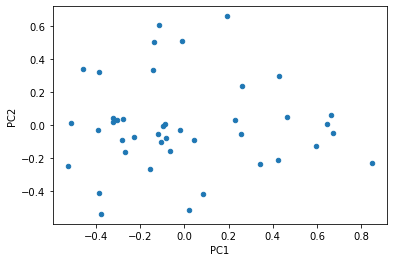

In [43]:
pc2 = pc[[0, 1]]
pc2 = pc2.rename(columns = {0 : "PC1", 1: "PC2"})
pc2.plot.scatter("PC1", "PC2")

In [45]:
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters=3).fit(pc2)

In [46]:
GROxcols['Labels_PCA'] = kmeans_pca.labels_
#the PCA reduced to 2 dimensions, easier to visualise clusters and improve performance(?), easier to calculate distances and find outliers

<ipython-input-46-043be12e63c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GROxcols['Labels_PCA'] = kmeans_pca.labels_


In [48]:
df = GROxcols[["Tree cover_final", "Fossil per cap_final", "Air poll_final", "Natural resource rents as % GDP", "CO2 emissions tons per capita", "Renewable_final", "Labels_PCA"]]
#renewable is the only variable that should be high for better performance
df["Country"] = GROmerge["Country"]
df['Green recovery spending'] = GROfinal['Green recovery spending']
df['Percent'] = GROfinal['Percent']
df['Country Code'] = GROmerge['Country Code']
df1 = df.sort_values(by=['Labels_PCA'], inplace=False)
df1 = df1.reset_index(drop=True)
df1

<ipython-input-48-c91c79ee9f8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Country"] = GROmerge["Country"]
<ipython-input-48-c91c79ee9f8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Green recovery spending'] = GROfinal['Green recovery spending']
<ipython-input-48-c91c79ee9f8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,Tree cover_final,Fossil per cap_final,Air poll_final,Natural resource rents as % GDP,CO2 emissions tons per capita,Renewable_final,Labels_PCA,Country,Green recovery spending,Percent,Country Code
0,0.060,189.040,25.2,39.80,3.99,5.072000e+03,0,Iraq,0.00,0.00,IRQ
1,54.360,138.180,24.0,0.09,6.71,2.161967e+04,0,Israel,0.62,28.57,ISR
2,3518.710,300.560,10.0,0.01,4.20,3.204652e+05,0,Switzerland,1.57,53.58,CHE
3,2292.160,135.380,20.2,0.14,2.79,7.620430e+03,0,Jamaica,0.05,100.00,JAM
4,21332.556,135.380,20.2,0.01,3.27,3.177450e+03,0,Mauritius,0.01,100.00,MUS
5,33993.590,139.172,11.4,0.08,2.22,3.777062e+04,0,Panama,0.18,50.00,PAN
6,10370.410,122.730,9.0,0.02,7.26,5.142148e+04,0,Ireland,0.36,6.30,IRL
7,28376.640,228.020,12.0,0.59,5.30,6.074462e+05,1,United Kingdom,65.67,16.77,GBR
8,51380.580,15.300,17.0,0.09,8.55,3.540534e+05,1,Japan,23.67,12.28,JPN
9,327437.780,143.660,22.0,2.20,3.60,4.766288e+05,1,Mexico,0.00,0.00,MEX


In [49]:
from jupyter_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [50]:
gdp = pd.read_excel(r'C:\Users\ebloom\Desktop\GDP_WorldBank.xls', sheet_name="Data", header=3)
gdp = gdp[['Country Name', 'Country Code', '2019']]
#https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
#GDP (Current USD)
gdp[gdp['Country Name']=='Korea, Rep.']
gdp.at[126, 'Country Name'] = 'South Korea'
gdp = merge.merge(gdp, how='left', left_on='Country', right_on='Country Name')
#find recovery spending as a percentage of GDP
#make them the same unit USD billions
gdp['2019'] = gdp['2019']/1000000000
gdp['RS_GDP'] = (gdp['Recovery spending'] / gdp['2019']) *100
gdp = gdp.drop(index=[5, 10, 13, 14, 46])
gdp
#merge
#import World Bank GDP data 2019

,Country,Green recovery spending,Recovery spending,Percent,Country Name,Country Code,2019,RS_GDP
0,Argentina,0.00,6.82,0.00,Argentina,ARG,445.445177,1.531053
1,Australia,2.30,130.95,1.76,Australia,AUS,1396.567015,9.376564
2,Austria,0.38,1.60,23.75,Austria,AUT,445.075392,0.359490
3,Bangladesh,0.55,0.63,87.30,Bangladesh,BGD,302.563399,0.208221
4,Brazil,0.28,0.54,51.85,Brazil,BRA,1877.810514,0.028757
6,Canada,21.67,38.70,55.99,Canada,CAN,1741.576394,2.222125
7,Chile,0.45,3.13,14.38,Chile,CHL,279.385487,1.120316
8,China,51.88,427.52,12.14,China,CHN,14279.937467,2.993851
9,Colombia,0.15,0.32,46.88,Colombia,COL,323.429889,0.098940
11,Denmark,8.24,13.29,62.00,Denmark,DNK,350.104328,3.796011


In [51]:
gdp['Development'] = ['Emerging and Developing Economies', 'Advanced Economies', 'Advanced Economies', 'Emerging and Developing Economies',
                     'Emerging and Developing Economies', 'Advanced Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies',
                     'Emerging and Developing Economies', 'Advanced Economies', 'Emerging and Developing Economies', 'Advanced Economies', 'Advanced Economies',
                     'Advanced Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies',
                     'Emerging and Developing Economies', 'Advanced Economies', 'Advanced Economies', 'Advanced Economies', 'Emerging and Developing Economies',
                     'Advanced Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies',
                     'Advanced Economies', 'Advanced Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies',
                     'Emerging and Developing Economies', 'Advanced Economies', 'Emerging and Developing Economies', 'Advanced Economies', 'Advanced Economies',
                     'Advanced Economies', 'Advanced Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies', 'Advanced Economies', 'Advanced Economies']

In [52]:
gdp.reset_index(inplace=True)
gdp = gdp.merge(pc, how='left', left_index=True, right_index=True)
gdp.rename(columns = {0 : "PC1", 1 : "PC2"}, inplace=True)
gdp

,index,Country,Green recovery spending,Recovery spending,Percent,Country Name,Country Code,2019,RS_GDP,Development,PC1,PC2,2,3,4,5
0,0,Argentina,0.00,6.82,0.00,Argentina,ARG,445.445177,1.531053,Emerging and Developing Economies,-0.018338,-0.028288,0.214023,-0.075619,0.124549,0.046873
1,1,Australia,2.30,130.95,1.76,Australia,AUS,1396.567015,9.376564,Advanced Economies,-0.526783,-0.245555,0.411264,-0.045195,0.072473,0.081128
2,2,Austria,0.38,1.60,23.75,Austria,AUT,445.075392,0.359490,Advanced Economies,-0.275209,0.036080,-0.083036,0.021876,0.028426,-0.026476
3,3,Bangladesh,0.55,0.63,87.30,Bangladesh,BGD,302.563399,0.208221,Emerging and Developing Economies,0.672068,-0.044354,-0.217309,-0.101147,-0.058864,-0.048601
4,4,Brazil,0.28,0.54,51.85,Brazil,BRA,1877.810514,0.028757,Emerging and Developing Economies,0.083729,-0.415684,0.128102,-0.205465,-0.111905,-0.014082
5,6,Canada,21.67,38.70,55.99,Canada,CAN,1741.576394,2.222125,Advanced Economies,-0.387519,-0.408469,0.127999,0.098828,-0.040725,0.100680
6,7,Chile,0.45,3.13,14.38,Chile,CHL,279.385487,1.120316,Emerging and Developing Economies,0.044602,-0.090568,0.165543,0.040704,0.106592,0.044575
7,8,China,51.88,427.52,12.14,China,CHN,14279.937467,2.993851,Emerging and Developing Economies,0.019446,-0.512737,0.007576,0.050072,0.230274,-0.168946
8,9,Colombia,0.15,0.32,46.88,Colombia,COL,323.429889,0.098940,Emerging and Developing Economies,0.423574,-0.212440,0.120690,-0.074229,0.084186,0.037201
9,11,Denmark,8.24,13.29,62.00,Denmark,DNK,350.104328,3.796011,Advanced Economies,-0.096108,-0.003826,-0.028128,0.154585,-0.131959,0.022041


In [53]:
df['Development'] = ['Emerging and Developing Economies', 'Advanced Economies', 'Advanced Economies', 'Emerging and Developing Economies',
                     'Emerging and Developing Economies', 'Advanced Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies',
                     'Emerging and Developing Economies', 'Advanced Economies', 'Emerging and Developing Economies', 'Advanced Economies', 'Advanced Economies',
                     'Advanced Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies',
                     'Emerging and Developing Economies', 'Advanced Economies', 'Advanced Economies', 'Advanced Economies', 'Emerging and Developing Economies',
                     'Advanced Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies',
                     'Advanced Economies', 'Advanced Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies',
                     'Emerging and Developing Economies', 'Advanced Economies', 'Emerging and Developing Economies', 'Advanced Economies', 'Advanced Economies',
                     'Advanced Economies', 'Advanced Economies', 'Emerging and Developing Economies', 'Emerging and Developing Economies', 'Advanced Economies', 'Advanced Economies']
df = df.sort_values(by=['Development'])
df.reset_index(inplace=True)
df

<ipython-input-53-e581b70d3422>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Development'] = ['Emerging and Developing Economies', 'Advanced Economies', 'Advanced Economies', 'Emerging and Developing Economies',


,index,Tree cover_final,Fossil per cap_final,Air poll_final,Natural resource rents as % GDP,CO2 emissions tons per capita,Renewable_final,Labels_PCA,Country,Green recovery spending,Percent,Country Code,Development
0,20,59704.920,159.230,15.0,0.09,5.25,9.072257e+05,1,Italy,0.90,1.53,ITA,Advanced Economies
1,37,3518.710,300.560,10.0,0.01,4.20,3.204652e+05,0,Switzerland,1.57,53.58,CHE,Advanced Economies
2,36,332826.990,169.290,5.0,0.39,3.39,7.389144e+05,1,Sweden,1.10,41.67,SWE,Advanced Economies
3,35,71021.860,40.350,10.0,0.05,5.33,6.176850e+05,1,Spain,51.19,23.30,ESP,Advanced Economies
4,34,20731.600,27.230,26.0,0.10,11.74,2.740708e+06,1,South Korea,53.30,26.80,KOR,Advanced Economies
5,32,76720.940,54.970,22.0,0.69,7.96,3.335190e+05,1,Poland,5.24,30.77,POL,Advanced Economies
6,27,64784.060,158.430,9.0,6.98,6.78,4.980923e+05,1,Norway,4.42,53.51,NOR,Advanced Economies
7,26,2481.330,22.880,13.0,0.25,8.76,1.528833e+05,1,Netherlands,0.18,0.66,NLD,Advanced Economies
8,22,51380.580,15.300,17.0,0.09,8.55,3.540534e+05,1,Japan,23.67,12.28,JPN,Advanced Economies
9,40,28376.640,228.020,12.0,0.59,5.30,6.074462e+05,1,United Kingdom,65.67,16.77,GBR,Advanced Economies


In [54]:
gdp = gdp.sort_values(by=['Development'])
gdp.reset_index(inplace=True)
gdp

,level_0,index,Country,Green recovery spending,Recovery spending,Percent,Country Name,Country Code,2019,RS_GDP,Development,PC1,PC2,2,3,4,5
0,20,24,Italy,0.90,58.66,1.53,Italy,ITA,2004.913358,2.925812,Advanced Economies,-0.320391,0.020756,-0.074281,-0.129017,0.070349,-0.121583
1,37,41,Switzerland,1.57,2.93,53.58,Switzerland,CHE,731.474368,0.400561,Advanced Economies,-0.456137,0.339258,-0.216004,-0.184415,-0.000617,-0.199985
2,36,40,Sweden,1.10,2.64,41.67,Sweden,SWE,531.283304,0.496910,Advanced Economies,-0.388826,-0.029384,0.082137,-0.238901,-0.245103,0.013776
3,35,39,Spain,51.19,219.70,23.30,Spain,ESP,1393.490525,15.766164,Advanced Economies,-0.227967,-0.068680,-0.285323,0.022998,-0.125690,-0.021304
4,34,38,South Korea,53.30,198.91,26.80,South Korea,KOR,1646.739220,12.079022,Advanced Economies,-0.156788,-0.265328,-0.250717,0.230127,0.132920,-0.170678
5,32,36,Poland,5.24,17.03,30.77,Poland,POL,595.862087,2.858044,Advanced Economies,-0.105781,-0.099246,0.025763,0.126219,0.095047,0.053080
6,27,31,Norway,4.42,8.26,53.51,Norway,NOR,405.510000,2.036941,Advanced Economies,-0.281371,-0.091277,0.394030,0.005746,-0.099733,0.045950
7,26,30,Netherlands,0.18,27.17,0.66,Netherlands,NLD,907.050863,2.995422,Advanced Economies,-0.086397,0.006002,-0.149846,0.336304,-0.118584,0.031251
8,22,26,Japan,23.67,192.83,12.28,Japan,JPN,5064.872876,3.807203,Advanced Economies,-0.064827,-0.154322,-0.326823,0.256840,-0.035790,0.059935
9,40,44,United Kingdom,65.67,391.55,16.77,United Kingdom,GBR,2830.813508,13.831713,Advanced Economies,-0.324463,0.047102,0.172709,-0.105170,0.006264,-0.085369


In [56]:
#dash
import plotly.graph_objects as go

#bubble charts with spending vs env perf metric, colour is cluster label, size is percent
#not great
#overlay different metrics vs spending - quadrant plot put in these axes not about relationship between variables but where individual countries are, relative to others
hover_text = []
for index, row in df.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Green recovery spending as % of recovery spending: {percent}<br>'+
                      'Annual tree cover loss (ha): {treecover}<br>'+
                      'Green recovery spending (USD billions): {grs}<br>').format(country=row['Country'],
                                            percent=row['Percent'],
                                            treecover=row['Tree cover_final'],
                                            grs=row['Green recovery spending'],
                                            ))


limits = [(0, 20), (20, 41)]
color = ['green', 'lightgreen']
name = ['Advanced Economies', 'Emerging and Developing Economies']
fig = go.Figure()
for i in range(2):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scatter(x=df_sub['Tree cover_final'], y=df_sub['Green recovery spending'],
                    text=hover_text[lim[0]:lim[1]],
                    mode='markers',
                    marker=dict(size=df_sub['Percent'],
                                color=color[i]),
                    name=name[i]))

fig.update_layout(
        title_text = 'COVID-19 Green Recovery Spending vs 2019 Annual Tree Cover Loss',
        showlegend = True,
        clickmode = 'event+select',
        xaxis=dict(
            title='Annual tree cover loss (hectares)',
            #gridcolor='white',
            type='log',
            #gridwidth=2,
        ),
        yaxis=dict(
            title='Green recovery spending (USD billions)',
            type='log',
            #gridcolor='white',
            #gridwidth=2,
        ),
        #legend= {'itemsizing': 'constant'},
)

sizeref = 2 * max(df['Percent']) / (30 ** 2)
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=1, line_color='black'))

fig.add_vline(x=np.median(df['Tree cover_final']), line_width=3, line_color="green", opacity=0.2)
fig.add_hline(y=np.median(df['Green recovery spending']), line_width=3, line_color="green", opacity=0.2)

fig.add_annotation(
      x=1,  # head
      y=1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Current leaders', 
      showarrow=False,
    )
    
fig.add_annotation(
      x=1,  # head
      y=-1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Potential to act', 
      showarrow=False,
    )

fig.add_annotation(
      x=6,  # head
      y=1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Early promise', 
      showarrow=False,
    )

fig.add_annotation(
      x=6,  # head
      y=-1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Missed opportunities', 
      showarrow=False,
    )

#bubble charts with spending vs env perf metric, colour is cluster label, size is percent
#not great
#overlay different metrics vs spending - quadrant plot put in these axes not about relationship between variables but where individual countries are, relative to others
hover_text = []
for index, row in df.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Green recovery spending as % of recovery spending: {percent}<br>'+
                      'Final renewable energy consumption (TJ): {renew}<br>'+
                      'Green recovery spending (USD billions): {grs}<br>').format(country=row['Country'],
                                            percent=row['Percent'],
                                            renew=row['Renewable_final'],
                                            grs=row['Green recovery spending'],
                                            ))


limits = [(0, 20), (20, 41)]
color = ['darkblue', 'royalblue']
name = ['Advanced Economies', 'Emerging and Developing Economies']
fig1 = go.Figure()
for i in range(2):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig1.add_trace(go.Scatter(x=df_sub['Renewable_final'], y=df_sub['Green recovery spending'],
                    text=hover_text[lim[0]:lim[1]],
                    mode='markers',
                    marker=dict(size=df_sub['Percent'],
                                color=color[i]),
                    name=name[i]))

fig1.update_layout(
        title_text = 'Green recovery spending vs Final renewable energy consumption 2018',
        showlegend = True,
        clickmode = 'event+select',
        xaxis=dict(
            title='Final renewable energy consumption (terajoules)',
            #gridcolor='white',
            type='log',
            #gridwidth=2,
        ),
        yaxis=dict(
            title='Green recovery spending (USD billions)',
            type='log',
            #gridcolor='white',
            #gridwidth=2,
        ),
        #legend= {'itemsizing': 'constant'},
)

sizeref = 2 * max(df['Percent']) / (30 ** 2)
fig1.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=1, line_color='black'))

fig1.add_vline(x=np.median(df['Renewable_final']), line_width=3, line_color="blue", opacity=0.2)
fig1.add_hline(y=np.median(df['Green recovery spending']), line_width=3, line_color="blue", opacity=0.2)

fig1.add_annotation(
      x=4,  # head
      y=1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Early promise', 
      showarrow=False,
    )
    
fig1.add_annotation(
      x=4,  # head
      y=-1,   
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Missed opportunities', 
      showarrow=False,
    )

fig1.add_annotation(
      x=6.5,  # head
      y=1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Current leaders', 
      showarrow=False,
    )

fig1.add_annotation(
      x=6.5,  # head
      y=-1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Potential to act', 
      showarrow=False,
    )

#bubble charts with spending vs env perf metric, colour is cluster label, size is percent
#not great
#overlay different metrics vs spending - quadrant plot put in these axes not about relationship between variables but where individual countries are, relative to others
hover_text = []
for index, row in df.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Green recovery spending as % of recovery spending: {percent}<br>'+
                      'Natural resource rents as % of GDP: {nr}<br>'+
                      'Green recovery spending (USD billions): {grs}<br>').format(country=row['Country'],
                                            percent=row['Percent'],
                                            nr=row['Natural resource rents as % GDP'],
                                            grs=row['Green recovery spending'],
                                            ))


limits = [(0, 20), (20, 41)]
color = ['yellow', 'lightyellow']
name = ['Advanced Economies', 'Emerging and Developing Economies']
fig2 = go.Figure()
for i in range(2):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig2.add_trace(go.Scatter(x=df_sub['Natural resource rents as % GDP'], y=df_sub['Green recovery spending'],
                    text=hover_text[lim[0]:lim[1]],
                    mode='markers',
                    marker=dict(size=df_sub['Percent'],
                                color=color[i]),
                    name=name[i]))

fig2.update_layout(
        title_text = 'COVID-19 Green Recovery Spending vs 2019 Natural Resource Rents',
        showlegend = True,
        clickmode = 'event+select',
        xaxis=dict(
            title='Natural resource rents as % of GDP',
            #gridcolor='white',
            type='log',
            #gridwidth=2,
        ),
        yaxis=dict(
            title='Green recovery spending (USD billions)',
            type='log',
            #gridcolor='white',
            #gridwidth=2,
        ),
        #legend= {'itemsizing': 'constant'},
)

sizeref = 2 * max(df['Percent']) / (30 ** 2)
fig2.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=1, line_color='black'))

fig2.add_vline(x=np.median(df['Natural resource rents as % GDP']), line_width=3, line_color="yellow", opacity=0.2)
fig2.add_hline(y=np.median(df['Green recovery spending']), line_width=3, line_color="yellow", opacity=0.2)

fig2.add_annotation(
      x=-0.8,  # head
      y=1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Current leaders', 
      showarrow=False,
    )
    
fig2.add_annotation(
      x=-0.8,  # head
      y=-1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Potential to act', 
      showarrow=False,
    )

fig2.add_annotation(
      x=1,  # head
      y=1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Early promise', 
      showarrow=False,
    )

fig2.add_annotation(
      x=1,  # head
      y=-1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Missed opportunities', 
      showarrow=False,
    )

#bubble charts with spending vs env perf metric, colour is cluster label, size is percent
#not great
#overlay different metrics vs spending - quadrant plot put in these axes not about relationship between variables but where individual countries are, relative to others
hover_text = []
for index, row in df.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Green recovery spending as % of recovery spending: {percent}<br>'+
                      'Fossil fuel subsidies per capita (USD): {ff}<br>'+
                      'Green recovery spending (USD billions): {grs}<br>').format(country=row['Country'],
                                            percent=row['Percent'],
                                            ff=row['Fossil per cap_final'],
                                            grs=row['Green recovery spending'],
                                            ))


limits = [(0, 20), (20, 41)]
color = ['darkred', 'lightpink']
name = ['Advanced Economies', 'Emerging and Developing Economies']
fig3 = go.Figure()
for i in range(2):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig3.add_trace(go.Scatter(x=df_sub['Fossil per cap_final'], y=df_sub['Green recovery spending'],
                    text=hover_text[lim[0]:lim[1]],
                    mode='markers',
                    marker=dict(size=df_sub['Percent'],
                                color=color[i]),
                    name=name[i]))

fig3.update_layout(
        title_text = 'COVID-19 Green Recovery Spending vs 2019 Fossil Fuel Subisidies',
        showlegend = True,
        clickmode = 'event+select',
        xaxis=dict(
            title='Fossil fuel subsidies per capita (USD)',
            #gridcolor='white',
            type='log',
            #gridwidth=2,
        ),
        yaxis=dict(
            title='Green recovery spending (USD billions)',
            type='log',
            #gridcolor='white',
            #gridwidth=2,
        ),
        #legend= {'itemsizing': 'constant'},
)

sizeref = 2 * max(df['Percent']) / (30 ** 2)
fig3.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=1, line_color='black'))

fig3.add_vline(x=np.median(df['Fossil per cap_final']), line_width=3, line_color="red", opacity=0.2)
fig3.add_hline(y=np.median(df['Green recovery spending']), line_width=3, line_color="red", opacity=0.2)

fig3.add_annotation(
      x=1,  # head
      y=1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Current leaders', 
      showarrow=False,
    )
    
fig3.add_annotation(
      x=1,  # head
      y=-1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Potential to act', 
      showarrow=False,
    )

fig3.add_annotation(
      x=2.2,  # head
      y=1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Early promise', 
      showarrow=False,
    )

fig3.add_annotation(
      x=2.2,  # head
      y=-1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Missed opportunities', 
      showarrow=False,
    )

#bubble charts with spending vs env perf metric, colour is cluster label, size is percent
#not great
#overlay different metrics vs spending - quadrant plot put in these axes not about relationship between variables but where individual countries are, relative to others
hover_text = []
for index, row in df.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Green recovery spending as % of recovery spending: {percent}<br>'+
                      'Annual mean concentration of particulates (<PM2.5): {airpoll}<br>'+
                      'Green recovery spending (USD billions): {grs}<br>').format(country=row['Country'],
                                            percent=row['Percent'],
                                            airpoll=row['Air poll_final'],
                                            grs=row['Green recovery spending'],
                                            ))


limits = [(0, 20), (20, 41)]
color = ['indigo', 'magenta']
name = ['Advanced Economies', 'Emerging and Developing Economies']
fig4 = go.Figure()
for i in range(2):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig4.add_trace(go.Scatter(x=df_sub['Air poll_final'], y=df_sub['Green recovery spending'],
                    text=hover_text[lim[0]:lim[1]],
                    mode='markers',
                    marker=dict(size=df_sub['Percent'],
                                color=color[i]),
                    name=name[i]))

fig4.update_layout(
        title_text = 'COVID-19 Green Recovery Spending vs Air Pollution',
        showlegend = True,
        clickmode = 'event+select',
        xaxis=dict(
            title='Annual mean concentration of particulates (<PM2.5)',
            #gridcolor='white',
            type='log',
            #gridwidth=2,
        ),
        yaxis=dict(
            title='Green recovery spending (USD billions)',
            type='log',
            #gridcolor='white',
            #gridwidth=2,
        ),
        #legend= {'itemsizing': 'constant'},
)

sizeref = 2 * max(df['Percent']) / (30 ** 2)
fig4.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=1, line_color='black'))

fig4.add_vline(x=np.median(df['Air poll_final']), line_width=3, line_color="purple", opacity=0.2)
fig4.add_hline(y=np.median(df['Green recovery spending']), line_width=3, line_color="purple", opacity=0.2)

fig4.add_annotation(
      x=1,  # head
      y=1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Current leaders', 
      showarrow=False,
    )
    
fig4.add_annotation(
      x=1,  # head
      y=-1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Potential to act', 
      showarrow=False,
    )

fig4.add_annotation(
      x=1.75,  # head
      y=1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Early promise', 
      showarrow=False,
    )

fig4.add_annotation(
      x=1.75,  # head
      y=-1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Missed opportunities', 
      showarrow=False,
    )

#bubble charts with spending vs env perf metric, colour is cluster label, size is percent
#not great
#overlay different metrics vs spending - quadrant plot put in these axes not about relationship between variables but where individual countries are, relative to others
hover_text = []
for index, row in df.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Green recovery spending as % of recovery spending: {percent}<br>'+
                      'CO2 emissions per capita (tons CO2/population): {co2}<br>'+
                      'Green recovery spending (USD billions): {grs}<br>').format(country=row['Country'],
                                            percent=row['Percent'],
                                            co2=row['CO2 emissions tons per capita'],
                                            grs=row['Green recovery spending'],
                                            ))


limits = [(0, 20), (20, 41)]
color = ['darkgray', 'lightgray']
name = ['Advanced Economies', 'Emerging and Developing Economies']
fig5 = go.Figure()
for i in range(2):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig5.add_trace(go.Scatter(x=df_sub['CO2 emissions tons per capita'], y=df_sub['Green recovery spending'],
                    text=hover_text[lim[0]:lim[1]],
                    mode='markers',
                    marker=dict(size=df_sub['Percent'],
                                color=color[i]),
                    name=name[i]))

fig5.update_layout(
        title_text = 'COVID-19 Green Recovery Spending vs CO2 emissions per capita 2018',
        showlegend = True,
        clickmode = 'event+select',
        xaxis=dict(
            title='CO2 emissions per capita (tons CO2/population)',
            #gridcolor='white',
            type='log',
            #gridwidth=2,
        ),
        yaxis=dict(
            title='Green recovery spending (USD billions)',
            type='log',
            #gridcolor='white',
            #gridwidth=2,
        ),
        #legend= {'itemsizing': 'constant'},
)

sizeref = 2 * max(df['Percent']) / (30 ** 2)
fig5.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=1, line_color='black'))

fig5.add_vline(x=np.median(df['CO2 emissions tons per capita']), line_width=3, line_color="gray", opacity=0.2)
fig5.add_hline(y=np.median(df['Green recovery spending']), line_width=3, line_color="gray", opacity=0.2)

fig5.add_annotation(
      x=0.1,  # head
      y=1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Current leaders', 
      showarrow=False,
    )
    
fig5.add_annotation(
      x=0.1,  # head
      y=-1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Potential to act', 
      showarrow=False,
    )

fig5.add_annotation(
      x=1,  # head
      y=1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Early promise', 
      showarrow=False,
    )

fig5.add_annotation(
      x=1,  # head
      y=-1,  
      #ax=1,  # tail
      #ay=10,  
      xref='x',
      yref='y',
      #axref='x',
      #ayref='y',
      text='Missed opportunities', 
      showarrow=False,
    )

#vector plot redo original - also a bubble chart

hover_text = []
for index, row in gdp.iterrows():
    hover_text.append(('{country}<br>'+
                       '{dev} <br>'+
                      'Green recovery spending as % of recovery spending: {percent}<br>'+
                      'Recovery spending as % of GDP: {rs}<br>'+
                      'Total recovery spending (USD billions): {grs}<br>').format(country=row['Country'], dev=row['Development'],
                                            percent=row['Percent'],
                                            rs=row['RS_GDP'],
                                            grs=row['Recovery spending'],
                                            ))

fig6 = go.Figure()
limit = [(0, 20), (20, 41)]
color = ['darkblue', 'royalblue']
name = ['Advanced Economies', 'Emerging and Developing Economies']
for i in range(2):
    lim = limit[i]
    df_sub = gdp[lim[0]:lim[1]]
    fig6.add_trace(go.Scatter(
        x=df_sub['RS_GDP'], y=df_sub['Percent'],
        text=hover_text[lim[0]:lim[1]],
        mode='markers',
        marker=dict(
            size=df_sub['Recovery spending'],
            color=color[i]),
            name = name[i]))

fig6.update_layout(
    title='Green recovery spending by country, modified to show environmental performance',
    xaxis=dict(
        title='Recovery spending as % of GDP (logscale)',
        type='log',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Green recovery spending as % of recovery spending',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

sizeref = 2 * max(gdp['Recovery spending']) / (50 ** 2)
fig6.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=1, line_color='black'))

fig6.add_vline(x=1, line_width=3, line_color="gray", opacity=0.4)
fig6.add_hline(y=30, line_width=3, line_color="gray", opacity=0.4)

for index, row in gdp.iterrows():
    fig6.add_annotation(
      x=np.log10(row['RS_GDP']),  # head
      y=row['Percent']+(row['PC1']*30),  
      ax=np.log10(row['RS_GDP']),  # tail
      ay=row['Percent'],  
      xref='x',
      yref='y',
      axref='x',
      ayref='y',
      text='',  # show arrow only
      showarrow=True,
      arrowhead=3,
      arrowsize=1,
      arrowwidth=1,
      arrowcolor='black'
    )


external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__,  external_stylesheets=external_stylesheets)
figs = ['fig', 'fig1', 'fig2', 'fig3', 'fig4', 'fig5']

app.layout = html.Div([         
    html.H1(children='COVID-19 Green Recovery Spending'),

        html.Div(children='''
            Welcome.
        '''),
    
    html.Div([
        dcc.Graph(
            id='plot2',
            figure=fig6
        ),  
]),
    
    html.Div([
        dcc.Graph(id='plot'),
        
         html.Div([
            dcc.Dropdown(
                id='variables',
                options=[{'label': 'Annual tree cover loss', 'value': 'fig'},
                        {'label': 'Final renewable energy consumption', 'value': 'fig1'},
                        {'label': 'Natural resource rents', 'value': 'fig2'},
                        {'label': 'Fossil fuel subsidies', 'value': 'fig3'},
                        {'label': 'Air pollution', 'value': 'fig4'},
                        {'label': 'CO2 emissions per capita', 'value': 'fig5'},],
                #placeholder='Select a measure of environmental performance',
                value=figs[0],
            )
        ])
    ])
    
])

@app.callback(
    Output('plot', 'figure'),
    [Input('variables', 'value')])

def update_graph(fig_name):

    if fig_name == 'fig':
        return fig

    if fig_name == 'fig1':
        return fig1

    if fig_name == 'fig2':
        return fig2

    if fig_name == 'fig3':
        return fig3

    if fig_name == 'fig4':
        return fig4

    if fig_name == 'fig5':
        return fig5
        
app.run_server(mode='external', debug=True)

Dash app running on http://127.0.0.1:8050/


In [ ]:
#import plotly.io as pio
#pio.write_html(fig, file='index.html', auto_open=True)